In [1]:
import sys

sys.path.append('..')

from tqdm import tqdm
from core.cluster.community_detection import CommunityDetector
from core.loader.image_loader import ImageLoader
# from core.embed.face import FaceEmbedder

/Users/vsaravind/dev/ChatterChum/.venv/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
loader = ImageLoader("./datasets/people", auto_load=True)

In [35]:
import pickle

with open('loader.pkl', 'rb') as f:
    loader = pickle.load(f)

In [36]:
loader.update_face_index()

In [9]:
embedder = FaceEmbedder()
for key, img in tqdm(loader.iter(), total=len(loader.image_data)):
    embedder.embed(img)

100%|██████████| 39/39 [00:55<00:00,  1.42s/it]


In [3]:
cd = CommunityDetector(threshold=0.7, min_community_size = 2, init_max_size = 5)
clusters = cd.fit_predict(loader.image_data)
len(clusters)

/Users/vsaravind/dev/ChatterChum/.venv/lib/python3.10/site-packages/sentence_transformers/util.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  a = torch.tensor(a)


6

In [69]:
type(list(loader.image_data.values())[0].faces['face_1']['embedding'].flatten()[0])

numpy.float32

In [78]:
list(loader.image_data.values())[0].faces['face_1']['landmarks']

{'right_eye': [798.0892, 365.47208],
 'left_eye': [846.6707, 374.2574],
 'nose': [823.0467, 393.41568],
 'mouth_right': [791.69794, 408.23843],
 'mouth_left': [834.50104, 415.52585]}

In [54]:
cluster_imgs = []
for cluster in clusters:
    imgs = []
    for id, face_id in cluster:
        for key, item in loader.iter():
            if key == id:
                imgs.append(item.image)
    cluster_imgs.append(imgs)

Cluster 0


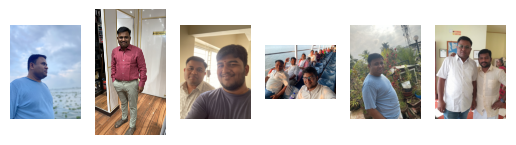

Cluster 1


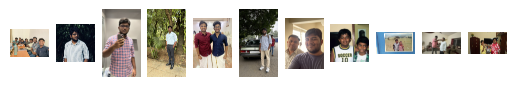

Cluster 2


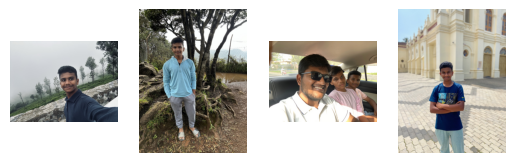

Cluster 3


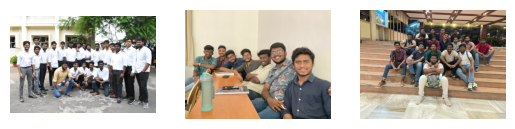

Cluster 4


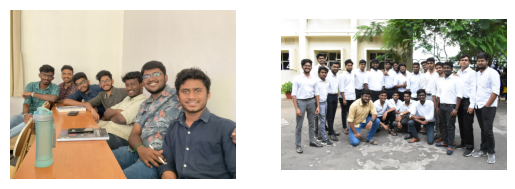

Cluster 5


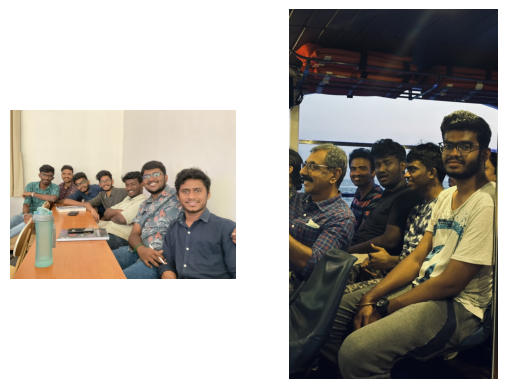

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# cluster_imgs is a list of lists of images
# each list of images is a cluster

for i, cluster in enumerate(cluster_imgs):
    print(f"Cluster {i}")
    fig, axs = plt.subplots(1, len(cluster))
    for j, img in enumerate(cluster):
        axs[j].imshow(img)
        axs[j].axis("off")
    plt.show()
    plt.close()

In [36]:
from core.extract.utils import extract_face
from PIL import Image

In [37]:
def crop_resize(img, box, image_size):
    x = box[0]
    y = box[1]
    w = box[2] - x
    h = box[3] - y

    out = img.crop(box).copy().resize((image_size, image_size), Image.BILINEAR)
    return out


def get_cluster_images(cluster):
    cluster_imgs = []
    for cluster in clusters:
        temp = []
        for c in cluster:
            img_id, _ = c
            temp.append(img_map[img_id].image)
        cluster_imgs.append(temp)
    return cluster_imgs


def plot_cluster(cluster_imgs):
    for i, cluster in enumerate(cluster_imgs):
        print(f"Cluster {i}")
        fig, axs = plt.subplots(1, len(cluster))
        for j, img in enumerate(cluster):
            axs[j].imshow(img)
            axs[j].axis("off")
        plt.show()
        plt.close()

Cluster 0


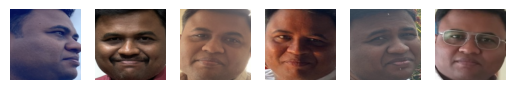

Cluster 0


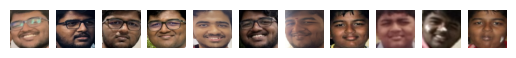

Cluster 0


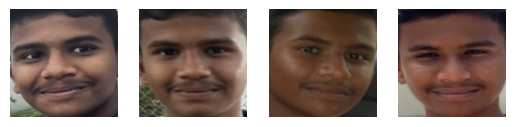

Cluster 0


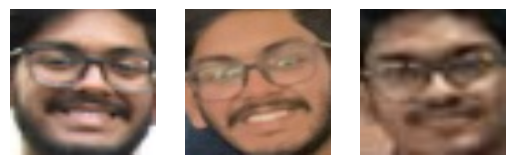

Cluster 0


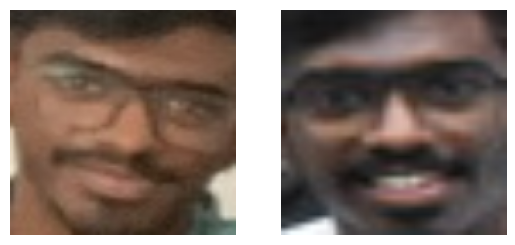

Cluster 0


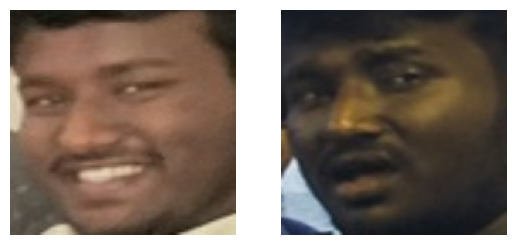

In [56]:
for cluster in clusters:
    imgs = []
    for idx in cluster:
        img = loader.image_data[idx[0]].image
        face = loader.image_data[idx[0]].faces[idx[1]]['facial_area']
        imgs.append(crop_resize(img, face, 160))
    plot_cluster([imgs])